<a href="https://colab.research.google.com/github/vattana198/Fake-Bank-Note/blob/main/Money_detection_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from tqdm import tqdm

In [74]:
# Hyperparameters
latent_dim = 100  # Size of the noise vector (input for the generator)
lr = 0.0002       # Learning rate for both generator and discriminator
batch_size = 64   # Batch size for training
epochs = 500      # Number of epochs
img_shape = (3, 64, 64)  # Image shape (3 channels, 64x64 pixels)
z_dim = 100  # Size of the noise vector
display_step = 400


In [75]:
# Transformations for input images
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize to 64x64
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])

In [76]:
from google.colab import drive
drive.mount('/content/drive')
dataset = datasets.ImageFolder(root='/content/drive/MyDrive/Money images ML', transform=transform)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
dataset[1]

(tensor([[[0.9059, 0.8824, 0.6235,  ..., 0.7804, 0.9059, 0.9373],
          [0.9059, 0.8588, 0.6157,  ..., 0.4902, 0.7725, 0.9373],
          [0.8902, 0.8431, 0.4510,  ..., 0.0980, 0.5451, 0.9059],
          ...,
          [0.8667, 0.8275, 0.7804,  ..., 0.8431, 0.8824, 0.9216],
          [0.9294, 0.9373, 0.9294,  ..., 0.9373, 0.9686, 0.9686],
          [0.9137, 0.9608, 0.9608,  ..., 0.9529, 0.9608, 0.9608]],
 
         [[0.9059, 0.8824, 0.6235,  ..., 0.8667, 0.9137, 0.9294],
          [0.9137, 0.8667, 0.6471,  ..., 0.5608, 0.7725, 0.9294],
          [0.8980, 0.8510, 0.5294,  ..., 0.1686, 0.5608, 0.9059],
          ...,
          [0.8667, 0.8353, 0.7882,  ..., 0.8431, 0.8902, 0.9216],
          [0.9294, 0.9373, 0.9373,  ..., 0.9373, 0.9608, 0.9608],
          [0.9137, 0.9529, 0.9529,  ..., 0.9373, 0.9451, 0.9451]],
 
         [[0.9216, 0.9059, 0.6471,  ..., 0.8667, 0.9294, 0.9451],
          [0.9216, 0.8902, 0.7020,  ..., 0.5843, 0.7961, 0.9451],
          [0.9137, 0.8824, 0.6392,  ...,

In [78]:
dataset[2]

(tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 0.9922,  ..., 0.9529, 1.0000, 1.0000],
          ...,
          [0.9765, 0.9608, 0.9529,  ..., 0.8980, 0.9137, 0.9451],
          [0.9843, 0.9765, 0.9765,  ..., 0.9765, 0.9843, 0.9843],
          [0.9765, 0.9608, 0.9686,  ..., 0.9843, 0.9843, 0.9922]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 0.9529, 1.0000, 1.0000],
          ...,
          [0.9922, 0.9843, 0.9765,  ..., 0.9294, 0.9451, 0.9686],
          [0.9922, 0.9922, 0.9922,  ..., 1.0000, 1.0000, 1.0000],
          [0.9843, 0.9843, 0.9922,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ...,

In [79]:
dataset[2]

(tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 0.9922,  ..., 0.9529, 1.0000, 1.0000],
          ...,
          [0.9765, 0.9608, 0.9529,  ..., 0.8980, 0.9137, 0.9451],
          [0.9843, 0.9765, 0.9765,  ..., 0.9765, 0.9843, 0.9843],
          [0.9765, 0.9608, 0.9686,  ..., 0.9843, 0.9843, 0.9922]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 0.9529, 1.0000, 1.0000],
          ...,
          [0.9922, 0.9843, 0.9765,  ..., 0.9294, 0.9451, 0.9686],
          [0.9922, 0.9922, 0.9922,  ..., 1.0000, 1.0000, 1.0000],
          [0.9843, 0.9843, 0.9922,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ...,

In [80]:
class Generator(nn.Module):
    def __init__(self, latent_dim, img_shape):
        super(Generator, self).__init__()
        self.img_shape = img_shape
        self.model = nn.Sequential(
            nn.ConvTranspose2d(latent_dim, 512, kernel_size=4, stride=1, padding=0),  # 1x1 -> 4x4
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1),  # 4x4 -> 8x8
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),  # 8x8 -> 16x16
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),  # 16x16 -> 32x32
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(64, self.img_shape[0], kernel_size=4, stride=2, padding=1),  # 32x32 -> 64x64
            nn.Tanh()  # Output in range [-1, 1]
        )

    def forward(self, z):
        return self.model(z)


In [81]:
class Discriminator(nn.Module):
    def __init__(self, img_shape):
        super(Discriminator, self).__init__()
        self.img_shape = img_shape
        self.model = nn.Sequential(
            nn.Conv2d(img_shape[0], 64, kernel_size=4, stride=2, padding=1),  # First layer with 3 channels
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, 1, kernel_size=4, stride=1, padding=0),
            nn.Sigmoid()
        )

    def forward(self, img):
        return self.model(img)


In [82]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = Generator(latent_dim=z_dim, img_shape=img_shape).to(device)
discriminator = Discriminator(img_shape=img_shape).to(device)

# Optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

# Loss function
adversarial_loss = nn.BCELoss()


In [83]:
# Function to display tensor images
def show_tensor_images(image_tensor, num_images=25, size=(3, 64, 64)):
    image_tensor = (image_tensor + 1) / 2  # Rescale images to [0, 1]
    image_unflat = image_tensor.detach().cpu().view(-1, *size)
    grid_size = int(num_images ** 0.5)
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(grid_size, grid_size))
    for i, ax in enumerate(axes.flatten()):
        if i < num_images:
            ax.imshow(image_unflat[i].permute(1, 2, 0))  # Convert to HWC for RGB images
            ax.axis('off')
    plt.show()

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 11, Step 10: Generator loss: 6.0610, Discriminator loss: 0.0796


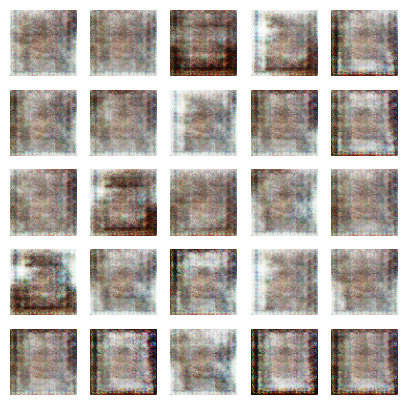

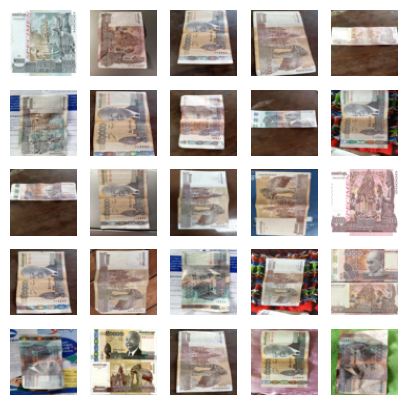

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 21, Step 20: Generator loss: 5.5039, Discriminator loss: 0.0723


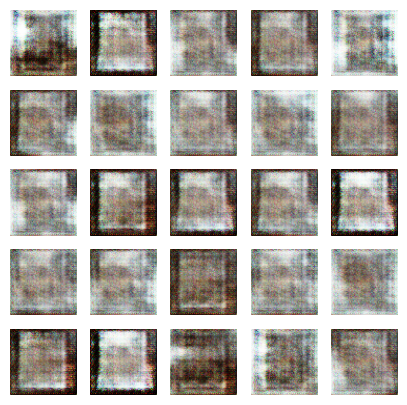

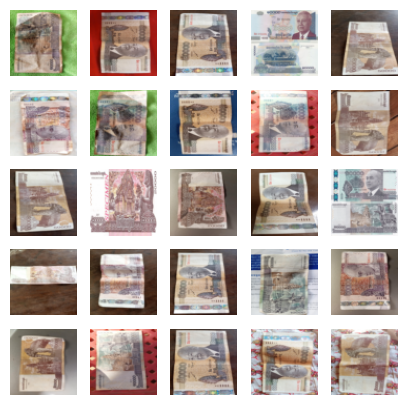

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 31, Step 30: Generator loss: 6.0661, Discriminator loss: 0.2915


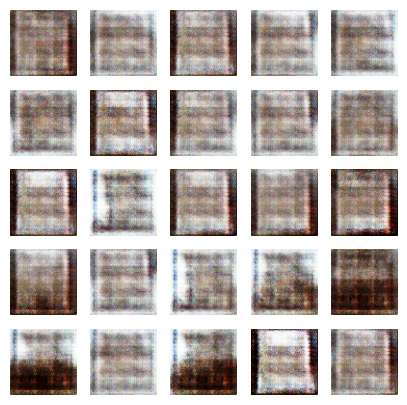

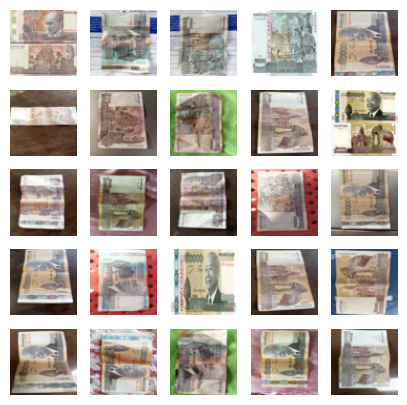

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 41, Step 40: Generator loss: 5.9539, Discriminator loss: 0.0961


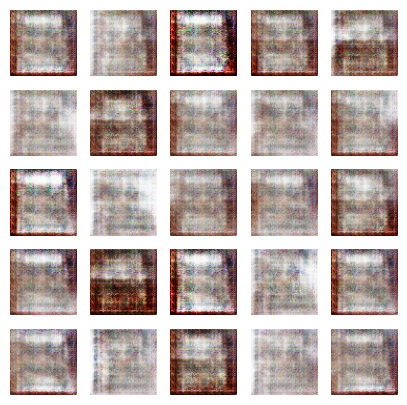

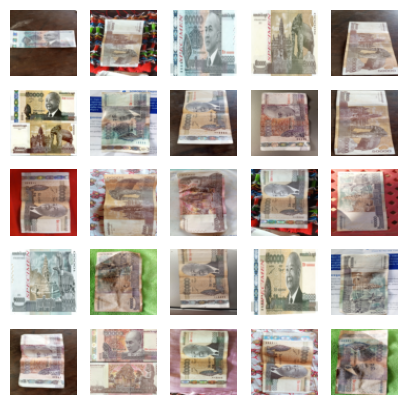

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 51, Step 50: Generator loss: 5.5020, Discriminator loss: 0.0773


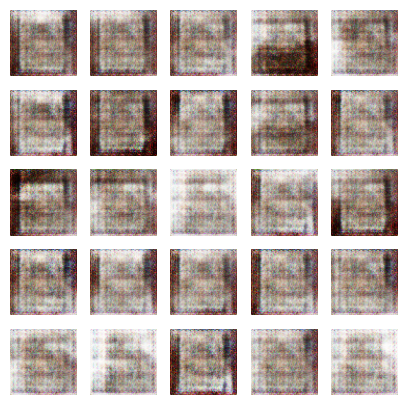

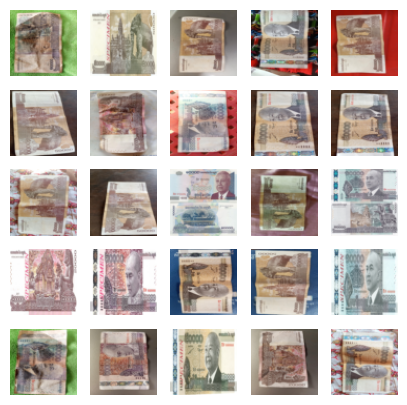

100%|██████████| 1/1 [00:09<00:00,  9.44s/it]


In [91]:
import torch
from tqdm import tqdm  # Ensure tqdm is imported for progress bar

n_epochs = 51
cur_step = 0
mean_generator_loss = 0
mean_discriminator_loss = 0
display_step = 10  # Adjust display frequency if needed

for epoch in range(n_epochs):
    for real_imgs, _ in tqdm(dataloader):  # Assuming 'dataloader' is defined
        cur_batch_size = len(real_imgs)
        real_imgs = real_imgs.to(device)  # Move real images to the correct device

        ## Update discriminator ##
        optimizer_D.zero_grad()  # Reset gradients for discriminator

        # Ensure the input noise has the shape [batch_size, z_dim, 1, 1]
        fake_noise = torch.randn(cur_batch_size, z_dim, 1, 1, device=device)  # Add the spatial dimensions
        fake_imgs = generator(fake_noise)  # Generate fake images

        disc_fake_pred = discriminator(fake_imgs.detach())  # Discriminator prediction on fake
        disc_fake_loss = adversarial_loss(disc_fake_pred, torch.zeros_like(disc_fake_pred))  # Fake loss
        disc_real_pred = discriminator(real_imgs)  # Discriminator prediction on real
        disc_real_loss = adversarial_loss(disc_real_pred, torch.ones_like(disc_real_pred))  # Real loss
        disc_loss = (disc_fake_loss + disc_real_loss) / 2  # Total discriminator loss

        # Track the average discriminator loss
        mean_discriminator_loss += disc_loss.item()

        # Backpropagation and optimizer step
        disc_loss.backward()
        optimizer_D.step()

        ## Update generator ##
        optimizer_G.zero_grad()  # Reset gradients for generator
        fake_noise_2 = torch.randn(cur_batch_size, z_dim, 1, 1, device=device)  # Generate noise for generator with correct shape
        fake_2 = generator(fake_noise_2)  # Generate fake images
        disc_fake_pred_2 = discriminator(fake_2)  # Discriminator prediction on fake
        gen_loss = adversarial_loss(disc_fake_pred_2, torch.ones_like(disc_fake_pred_2))  # Generator loss
        gen_loss.backward()
        optimizer_G.step()

        # Track the average generator loss
        mean_generator_loss += gen_loss.item()

        ## Visualization ##
        if cur_step % display_step == 0 and cur_step > 0:
            print(f"Epoch {epoch+1}, Step {cur_step}: Generator loss: {mean_generator_loss / display_step:.4f}, Discriminator loss: {mean_discriminator_loss / display_step:.4f}")
            show_tensor_images(fake_imgs)  # Show generated (fake) images
            show_tensor_images(real_imgs)  # Show real images
            mean_generator_loss = 0  # Reset the generator loss for the next set of steps
            mean_discriminator_loss = 0  # Reset the discriminator loss for the next set of steps

        cur_step += 1  # Increment the step counter


In [92]:
# Define the file paths where the models will be saved
generator_path = 'generator.pth'
discriminator_path = 'discriminator.pth'

# Save the state dict (weights) of the generator and discriminator
torch.save(generator.state_dict(), generator_path)
torch.save(discriminator.state_dict(), discriminator_path)

print("Models saved successfully!")

Models saved successfully!
